<a href="https://colab.research.google.com/github/imhyadav/manufacturing_defect/blob/main/manufacturing_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving manufacturing_defect_analysis_data.csv to manufacturing_defect_analysis_data.csv


{'manufacturing_defect_analysis_data.csv': b'machine_id,production_day,shift,units_produced,defective_units,machine_temperature,vibration_level,power_consumption,downtime_minutes,defect_rate\n2052,15,3,311,14,110.9,4.83,27.33,110,0.045\n2093,24,1,389,46,83.8,3.23,66.51,32,0.118\n2015,17,3,357,3,74.7,4.93,63.41,6,0.008\n2072,4,2,294,39,108.7,4.28,37.03,116,0.133\n2061,29,2,52,15,80.6,0.66,76.81,115,0.288\n2021,22,3,386,27,66.7,3.46,73.75,51,0.07\n2083,25,1,112,15,94.2,1.79,77.36,119,0.134\n2087,13,2,98,3,94.9,3.02,39.95,10,0.031\n2075,18,1,125,44,102.9,1.76,23.82,26,0.352\n2075,1,2,417,25,74.4,2.07,53.87,13,0.06\n2088,16,3,224,27,86.6,4.65,57.93,85,0.121\n2024,13,3,158,31,76.9,1.43,18.78,79,0.196\n2003,10,3,232,44,64.9,4.43,65.05,45,0.19\n2022,12,2,241,1,112.6,0.64,11.26,75,0.004\n2053,30,1,114,30,103.7,0.91,43.79,112,0.263\n2002,2,1,386,2,78.1,4.35,33.17,109,0.005\n2088,23,1,320,7,96.0,3.34,61.82,9,0.022\n2030,3,2,149,23,72.1,3.86,31.89,23,0.154\n2038,10,2,81,14,113.4,1.44,67.88,60,0.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("manufacturing_defect_analysis_data.csv")
df.head()


,machine_id,production_day,shift,units_produced,defective_units,machine_temperature,vibration_level,power_consumption,downtime_minutes,defect_rate
0,2052,15,3,311,14,110.9,4.83,27.33,110,0.045
1,2093,24,1,389,46,83.8,3.23,66.51,32,0.118
2,2015,17,3,357,3,74.7,4.93,63.41,6,0.008
3,2072,4,2,294,39,108.7,4.28,37.03,116,0.133
4,2061,29,2,52,15,80.6,0.66,76.81,115,0.288


In [4]:
df.corr()["defect_rate"].sort_values(ascending=False)


,defect_rate
defect_rate,1.000000
defective_units,0.559954
vibration_level,0.038357
downtime_minutes,0.006189
production_day,0.005076
shift,0.001816
power_consumption,-0.008201
machine_temperature,-0.008234
machine_id,-0.025026
units_produced,-0.602495


In [ ]:
df[["units_produced","defective_units"]].sum()


,0
units_produced,451132
defective_units,39227


In [ ]:
df.groupby("machine_id")["downtime_minutes"].mean().head()


,downtime_minutes
machine_id,
2001,64.280000
2002,69.400000
2003,66.000000
2004,62.937500
2005,61.777778


In [ ]:
df.groupby("machine_id")["defect_rate"].mean().mean()


np.float64(0.1224439346898964)

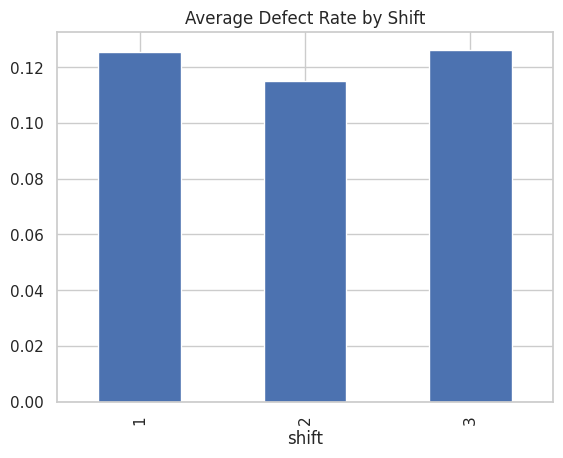

In [ ]:
shift_defect = df.groupby("shift")["defect_rate"].mean()

shift_defect.plot(kind="bar")
plt.title("Average Defect Rate by Shift")
plt.show()


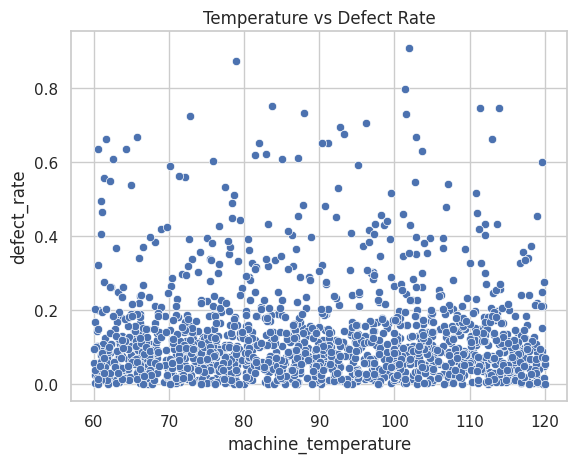

In [ ]:
sns.scatterplot(x="machine_temperature", y="defect_rate", data=df)
plt.title("Temperature vs Defect Rate")
plt.show()


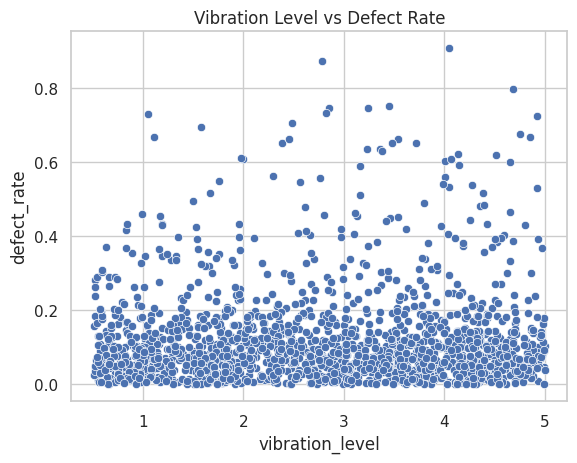

In [ ]:
sns.scatterplot(x="vibration_level", y="defect_rate", data=df)
plt.title("Vibration Level vs Defect Rate")
plt.show()


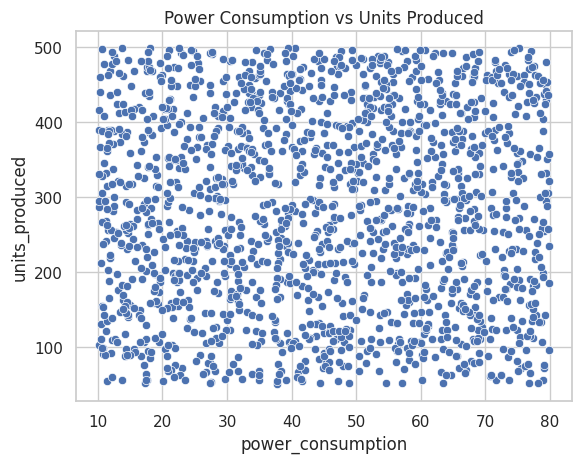

In [ ]:
sns.scatterplot(x="power_consumption", y="units_produced", data=df)
plt.title("Power Consumption vs Units Produced")
plt.show()


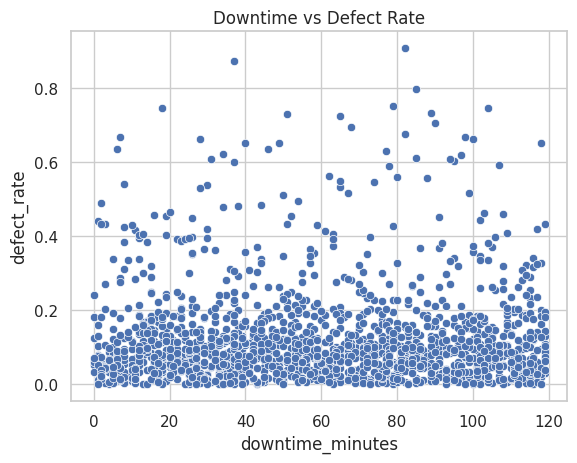

In [ ]:
sns.scatterplot(x="downtime_minutes", y="defect_rate", data=df)
plt.title("Downtime vs Defect Rate")
plt.show()


In [ ]:
df.groupby("machine_id")["defect_rate"].mean() \
  .sort_values(ascending=False).head(10)


,defect_rate
machine_id,
2008,0.219150
2046,0.212727
2091,0.206500
2071,0.193182
2094,0.191500
2059,0.183750
2089,0.172158
2067,0.170571
2040,0.169667


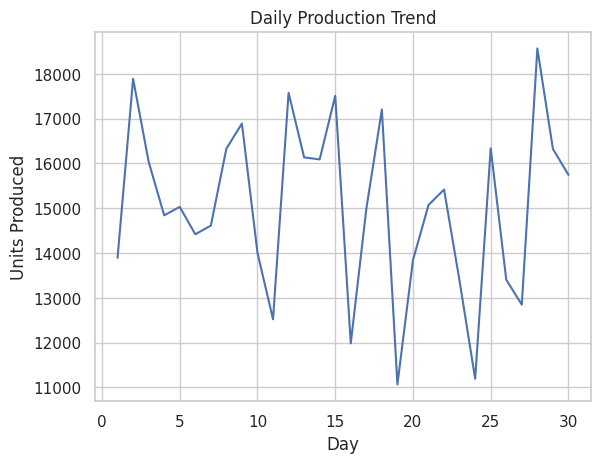

In [ ]:
daily_prod = df.groupby("production_day")["units_produced"].sum()

daily_prod.plot()
plt.title("Daily Production Trend")
plt.xlabel("Day")
plt.ylabel("Units Produced")
plt.show()


In [ ]:
maintenance = df.groupby("machine_id").agg({
    "defect_rate":"mean",
    "downtime_minutes":"mean"
})

maintenance.sort_values(
    by=["defect_rate","downtime_minutes"],
    ascending=False
).head(10)


,defect_rate,downtime_minutes
machine_id,,
2008,0.219150,59.250000
2046,0.212727,49.090909
2091,0.206500,51.000000
2071,0.193182,70.272727
2094,0.191500,53.500000
2059,0.183750,46.000000
2089,0.172158,57.210526
2067,0.170571,49.000000
2040,0.169667,61.333333


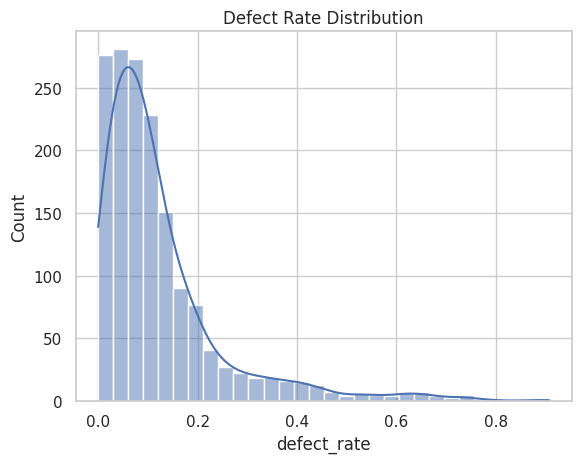

In [ ]:
sns.histplot(df["defect_rate"], bins=30, kde=True)
plt.title("Defect Rate Distribution")
plt.show()


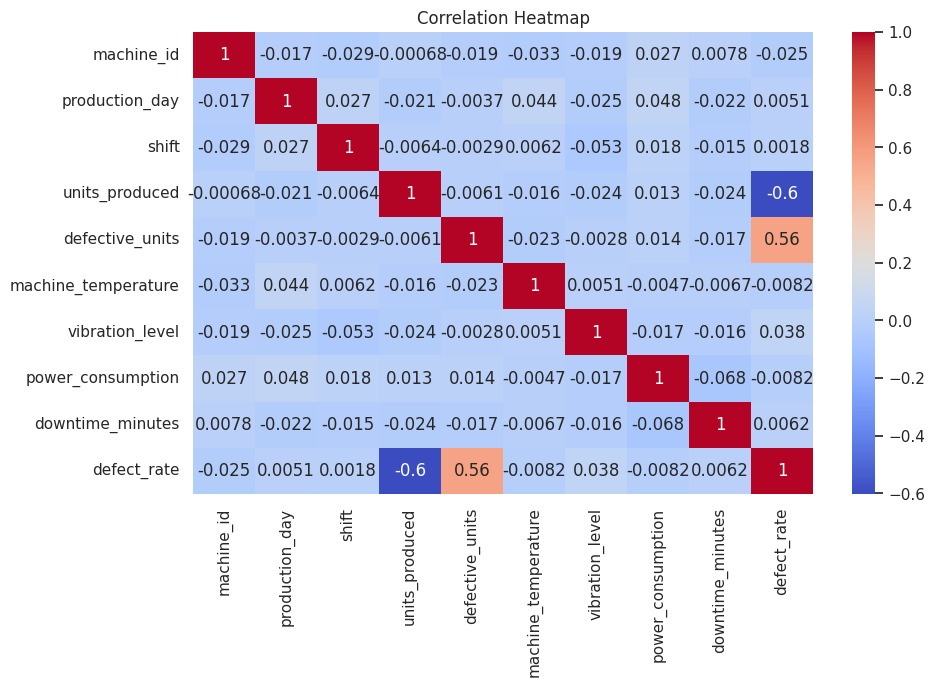

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
high_temp = df[df["machine_temperature"] > 100]

high_temp["defect_rate"].mean()


np.float64(0.121426103646833)

In [ ]:
max_downtime = df["downtime_minutes"].max()

df["quality_score"] = (
    1
    - df["defect_rate"]
    - (df["downtime_minutes"] / max_downtime)
)

df.groupby("machine_id")["quality_score"].mean() \
  .sort_values(ascending=False).head(10)


,quality_score
machine_id,
2065,0.621659
2075,0.590073
2078,0.579136
2057,0.553275
2041,0.542805
2035,0.526497
2010,0.498004
2031,0.482022
2030,0.481873
